# Lab assignment - 2 (Feed Forward Neural Networks)

In [1]:
## Import all the required libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import random_split,DataLoader,Subset
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor,Normalize
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [6]:
## loading the MNIST dataset from torchvision
mnist_dataset = datasets.MNIST(
    root='./data',
    train=True, 
    download=True,
    transform=ToTensor()
)

total_samples = len(mnist_dataset)

indices = list(range(total_samples))

## create training,validation and testing samples of required size
train_indices = indices[:5000]
val_indices = indices[5000:6000]
test_indices = indices[6000:8000]

train_dataset = Subset(mnist_dataset, train_indices)
val_dataset = Subset(mnist_dataset, val_indices)
test_dataset = Subset(mnist_dataset, test_indices)

# batch_size = 1

# Finally load the datasets using DataLoader
train_dataloader = DataLoader(train_dataset, batch_size = len(train_dataset), shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=False)

In [3]:
## Loading the normalized MNIST dataset

max_value = 1
min_value = 0

# Apply Min-Max Scaling to transform data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(min_value, max_value)  # Min-Max Scaling
])

## Now load the dataset with Min-Max transformation
mnist_dataset_normalized = datasets.MNIST(
    root='./data',
    train=True, 
    download=True,
    transform=transform
)

# Subsets for train, validation, and test sets
total_samples = len(mnist_dataset_normalized)
indices = list(range(total_samples))
train_indices = indices[:5000]
val_indices = indices[5000:6000]
test_indices = indices[6000:8000]

train_dataset_normalized = Subset(mnist_dataset_normalized, train_indices)
val_dataset_normalized = Subset(mnist_dataset_normalized, val_indices)
test_dataset_normalized = Subset(mnist_dataset_normalized, test_indices)

# DataLoaders
batch_size = len(train_dataset_normalized)
train_dataloader_normalized = DataLoader(train_dataset_normalized, 
                                         batch_size=batch_size, 
                                         shuffle=True)
val_dataloader_normalized = DataLoader(val_dataset_normalized, 
                                       batch_size=len(val_dataset_normalized), 
                                       shuffle=False)
test_dataloader_normalized = DataLoader(test_dataset_normalized, 
                                        batch_size=len(test_dataset_normalized), 
                                        shuffle=False)

## Forming Network - A

In [4]:
class Artificial_NN_A(nn.Module):
    
    def __init__(self):
        super(Artificial_NN_A, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(784,50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50,10)  
        )
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, input_d):
        input_outcome = self.flatten(input_d)
        hidden_outcome = self.hidden_layers(input_outcome)
        final_predictions = self.softmax(hidden_outcome)
        return final_predictions
                   

## Forming Netowrk - B 

In [5]:
class Artificial_NN_B(nn.Module):
    
    def __init__(self):
        super(Artificial_NN_B, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(784,150),
            nn.ReLU(),
            nn.Linear(150,150),
            nn.ReLU(),
            nn.Linear(150,10)  
        )
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, input_d):
        input_outcome = self.flatten(input_d)
        hidden_outcome = self.hidden_layers(input_outcome)
        final_predictions = self.softmax(hidden_outcome)
        return final_predictions

## Forming Network A with Normalized layers

In [6]:
class Artificial_NN_A_with_normalized_layer(nn.Module):
    
    def __init__(self):
        super(Artificial_NN_A_with_normalized_layer, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(784,50),
            nn.BatchNorm1d(50),  # adding normalization layer
            nn.ReLU(),
            nn.Linear(50,50),
            nn.BatchNorm1d(50),  # adding normalization layer
            nn.ReLU(),
            nn.Linear(50,10)  
        )
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, input_d):
        input_outcome = self.flatten(input_d)
        hidden_outcome = self.hidden_layers(input_outcome)
        final_predictions = self.softmax(hidden_outcome)
        return final_predictions

## Forming Network A with dropout layer

In [7]:
class Artificial_NN_A_with_dropout_layer(nn.Module):
    
    def __init__(self):
        super(Artificial_NN_A_with_dropout_layer, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(784,50),
            nn.ReLU(),
            nn.Dropout(0.5),  # adding a dropout layer
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50,10)  
        )
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, input_d):
        input_outcome = self.flatten(input_d)
        hidden_outcome = self.hidden_layers(input_outcome)
        final_predictions = self.softmax(hidden_outcome)
        return final_predictions

## Training of the Networks

In [8]:
def Train_Network(num_of_epochs, learning_rate, training_set, choose_model):
    
    ## making cases for choosing the required model
    if choose_model == 0: 
        ANN = Artificial_NN_A()  
    elif choose_model == 1: 
        ANN = Artificial_NN_B()
    elif choose_model == 2:
        ANN = Artificial_NN_A_with_normalized_layer()
    elif choose_model == 3:
        ANN = Artificial_NN_A_with_dropout_layer()

    # choosing the cross entropy loss
    loss_fn = nn.CrossEntropyLoss()

    # choose ADAM optimizer and learning rate
    optimizer = optim.Adam(ANN.parameters(), lr=learning_rate)
    
    losses = []  # List to store losses for plotting
    
    for epoch in range(num_of_epochs+1):
        
        for inputs, labels in training_set:
            
            optimizer.zero_grad()
            
            predictions = ANN(inputs)   # make predictions
            
            calc_loss = loss_fn(predictions, labels)  # calculate loss
            
            # Backprop
            calc_loss.backward()
            
            # update all the parameters
            optimizer.step()
            
            if epoch % 50 == 0:    
                print(f'Epoch {epoch}, Loss: {calc_loss.item()}')
                
            losses.append(calc_loss.item())  # Append loss for plotting
            
            if epoch == 500:
                print(f'Final_Loss: {calc_loss.item()}')
                    
    # Plotting loss versus epoch
    plt.plot(range(len(losses)), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Cross Entropy Loss vs Epoch')
    plt.show()
    
    return ANN  # return the model
                               

## Testing with the the trained Networks

In [9]:
def Test_Network(test_set, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_set:
            predictions = model(inputs)
            _, predicted = torch.max(predictions.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = (correct / total)*100
    print(f'Accuracy on the given data set: {accuracy} percent')
    return accuracy

## Task - 1

Epoch 0, Loss: 2.3023881912231445
Epoch 50, Loss: 1.832445502281189
Epoch 100, Loss: 1.7018424272537231
Epoch 150, Loss: 1.67948317527771
Epoch 200, Loss: 1.6152807474136353
Epoch 250, Loss: 1.600347638130188
Epoch 300, Loss: 1.5917302370071411
Epoch 350, Loss: 1.586074709892273
Epoch 400, Loss: 1.58290433883667
Epoch 450, Loss: 1.5809872150421143
Epoch 500, Loss: 1.579567313194275
Final_Loss: 1.579567313194275


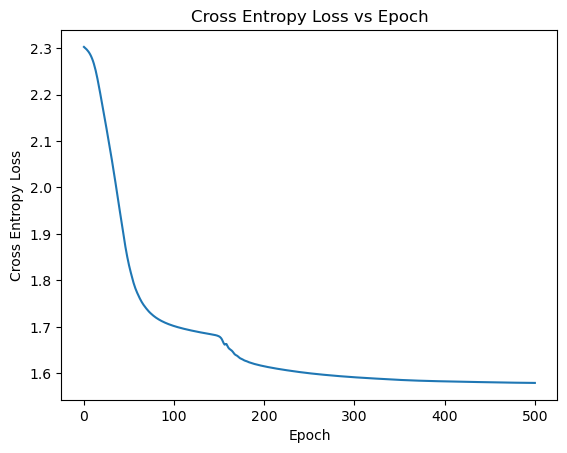

In [18]:
 trained_model = Train_Network(500,0.001,train_dataloader,0)

In [22]:
Test_Network(test_dataloader, trained_model) # with the testing dataset

Accuracy on the given data set: 83.7 percent


83.7

In [23]:
Test_Network(val_dataloader, trained_model) # with the validation dataset

Accuracy on the given data set: 83.6 percent


83.6

In [24]:
Test_Network(train_dataloader, trained_model) # with the test dataset

Accuracy on the given data set: 88.06 percent


88.06

## Task - 2

Epoch 0, Loss: 2.303021192550659
Epoch 50, Loss: 1.7824804782867432
Epoch 100, Loss: 1.5810401439666748
Epoch 150, Loss: 1.5389140844345093
Epoch 200, Loss: 1.5203545093536377
Epoch 250, Loss: 1.5100009441375732
Epoch 300, Loss: 1.5028778314590454
Epoch 350, Loss: 1.4970283508300781
Epoch 400, Loss: 1.4936473369598389
Epoch 450, Loss: 1.491761565208435
Epoch 500, Loss: 1.4892789125442505
Final_Loss: 1.4892789125442505


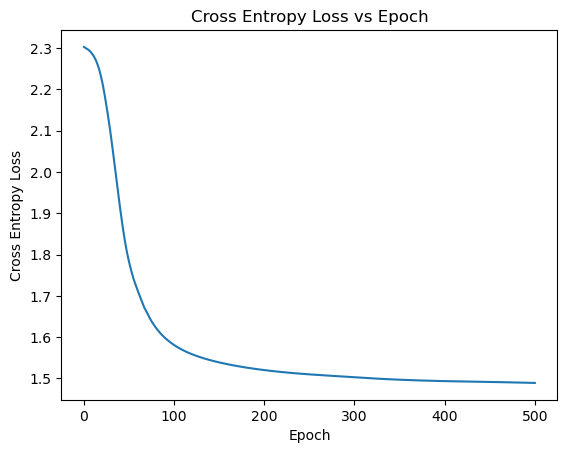

In [14]:
 model_2 = Train_Network(500,0.001,train_dataloader_normalized,0)

In [15]:
Test_Network(test_dataloader, model_2)  # with testing dataset

Accuracy on the given data set: 91.4 percent


91.4

In [16]:
Test_Network(val_dataloader, model_2)  # with validation dataset

Accuracy on the given data set: 92.5 percent


92.5

In [17]:
Test_Network(train_dataloader, model_2) # with the training dataset

Accuracy on the given data set: 97.38 percent


97.38

## Task - 3

Epoch 0, Loss: 2.302539348602295
Epoch 50, Loss: 1.790793776512146
Epoch 100, Loss: 1.611189842224121
Epoch 150, Loss: 1.510959267616272
Epoch 200, Loss: 1.483106255531311
Epoch 250, Loss: 1.4737969636917114
Epoch 300, Loss: 1.468858242034912
Epoch 350, Loss: 1.46638822555542
Epoch 400, Loss: 1.4651485681533813
Epoch 450, Loss: 1.464156985282898
Epoch 500, Loss: 1.4636321067810059
Final_Loss: 1.4636321067810059


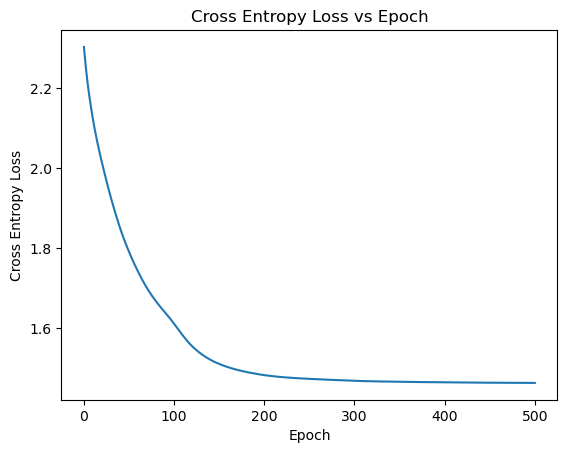

In [25]:
 model_3 = Train_Network(500,0.001,train_dataloader_normalized,2)

In [29]:
Test_Network(test_dataloader, model_3)   # testing accuracy

Accuracy on the given data set: 92.05 percent


92.05

In [30]:
Test_Network(val_dataloader, model_3)    # with validation set

Accuracy on the given data set: 91.8 percent


91.8

In [31]:
Test_Network(train_dataloader, model_3)    # with the training dataset

Accuracy on the given data set: 99.94 percent


99.94

## Task -4

Epoch 0, Loss: 2.3023674488067627
Epoch 50, Loss: 1.9213306903839111
Epoch 100, Loss: 1.731366753578186
Epoch 150, Loss: 1.6713441610336304
Epoch 200, Loss: 1.6440236568450928
Epoch 250, Loss: 1.6334506273269653
Epoch 300, Loss: 1.6220754384994507
Epoch 350, Loss: 1.6157269477844238
Epoch 400, Loss: 1.611839771270752
Epoch 450, Loss: 1.6060816049575806
Epoch 500, Loss: 1.604688286781311
Final_Loss: 1.604688286781311


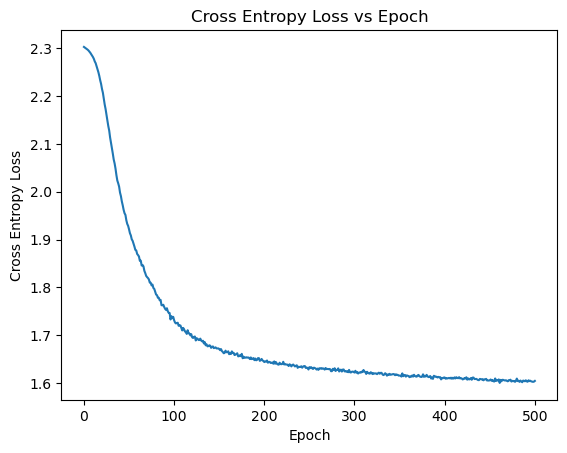

In [32]:
 model_4 = Train_Network(500,0.001,train_dataloader_normalized,3)

In [33]:
Test_Network(test_dataloader, model_4) # testing accuracy

Accuracy on the given data set: 82.1 percent


82.1

In [34]:
Test_Network(val_dataloader, model_4)    # with validation set

Accuracy on the given data set: 82.1 percent


82.1

In [35]:
Test_Network(train_dataloader, model_4)    # with the training dataset

Accuracy on the given data set: 86.56 percent


86.56

## Task - 5

Epoch 0, Loss: 2.302830219268799
Epoch 50, Loss: 1.5811645984649658
Epoch 100, Loss: 1.5706366300582886
Epoch 150, Loss: 1.5683077573776245
Epoch 200, Loss: 1.5676989555358887
Epoch 250, Loss: 1.5663771629333496
Epoch 300, Loss: 1.5652738809585571
Epoch 350, Loss: 1.5647108554840088
Epoch 400, Loss: 1.564011573791504
Epoch 450, Loss: 1.5635387897491455
Epoch 500, Loss: 1.5614540576934814
Final_Loss: 1.5614540576934814


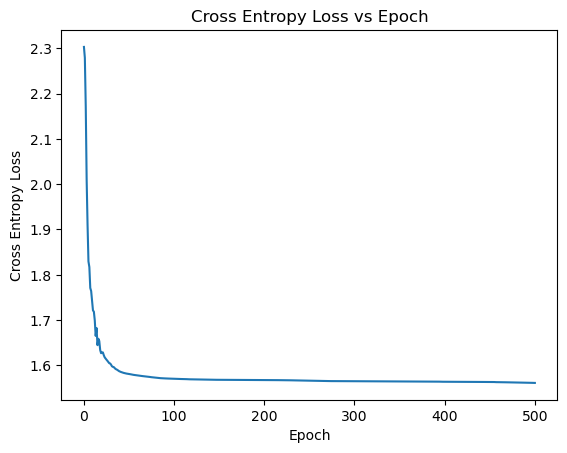

In [36]:
 model_5 = Train_Network(500,0.01,train_dataloader,1)

In [37]:
Test_Network(test_dataloader, model_5)  # testing accuracy

Accuracy on the given data set: 84.25 percent


84.25

In [38]:
Test_Network(val_dataloader, model_5)   # with validation set

Accuracy on the given data set: 86.6 percent


86.6

In [39]:
Test_Network(train_dataloader, model_5)    # with the training dataset

Accuracy on the given data set: 89.58 percent


89.58

## Task - 6

Epoch 0, Loss: 2.3028526306152344
Epoch 50, Loss: 1.6590851545333862
Epoch 100, Loss: 1.5361816883087158
Epoch 150, Loss: 1.5140005350112915
Epoch 200, Loss: 1.5044105052947998
Epoch 250, Loss: 1.498940348625183
Epoch 300, Loss: 1.4942748546600342
Epoch 350, Loss: 1.4915721416473389
Epoch 400, Loss: 1.489894986152649
Epoch 450, Loss: 1.488431692123413
Epoch 500, Loss: 1.4870641231536865
Final_Loss: 1.4870641231536865


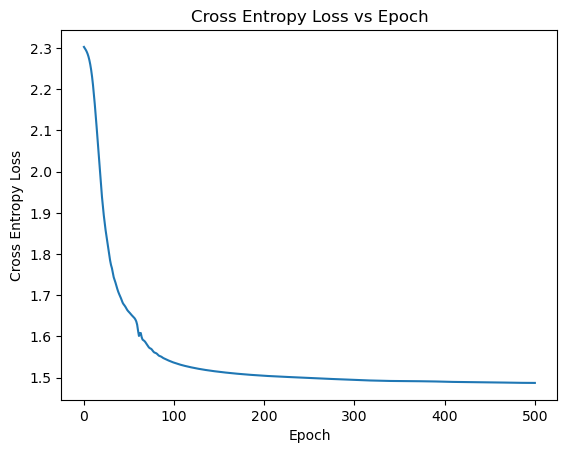

In [40]:
 model_6 = Train_Network(500,0.001,train_dataloader,1)

In [41]:
Test_Network(test_dataloader, model_6)   # testing accuracy

Accuracy on the given data set: 92.0 percent


92.0

In [42]:
Test_Network(val_dataloader, model_6)  # with validation set

Accuracy on the given data set: 91.4 percent


91.4

In [43]:
Test_Network(train_dataloader, model_6)    # with the training dataset

Accuracy on the given data set: 97.46000000000001 percent


97.46000000000001